In [23]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Classes
# _______________

# 0 	T-shirt/top
# 1 	Trouser
# 2 	Pullover
# 3 	Dress
# 4 	Coat
# 5 	Sandal
# 6 	Shirt
# 7 	Sneaker
# 8 	Bag
# 9 	Ankle boot

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [12]:
print train_images.shape, train_labels.shape

(60000, 28, 28) (60000,)


In [13]:
print test_images.shape, test_labels.shape

(10000, 28, 28) (10000,)


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

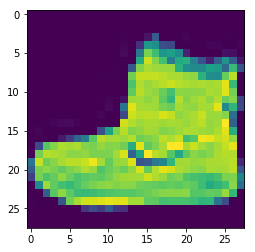

In [21]:
plt.figure()
plt.imshow(train_images[0])

In [22]:
train_images = train_images / 255.0

test_images = test_images / 255.0

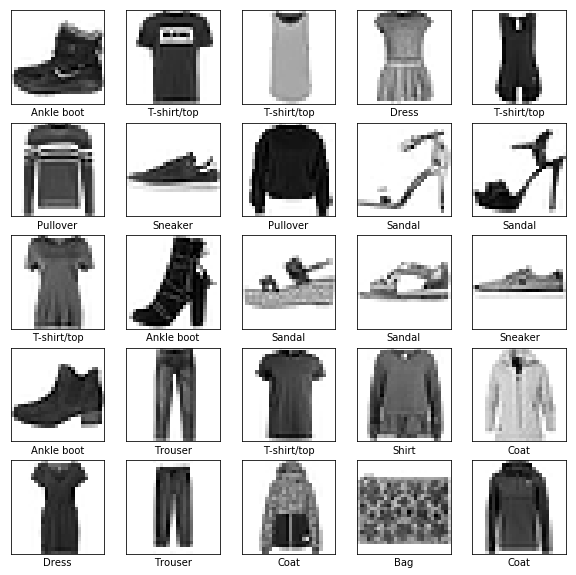

In [32]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [43]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"]
)

In [45]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.4547 - acc: 0.8403
Epoch 2/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.3685 - acc: 0.8669
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3333 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.3084 - acc: 0.8881
Epoch 5/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2936 - acc: 0.8926


In [46]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/step


In [47]:
print "Accuracy", test_accuracy 

Accuracy 0.8795


In [57]:
predictions = model.predict(test_images)

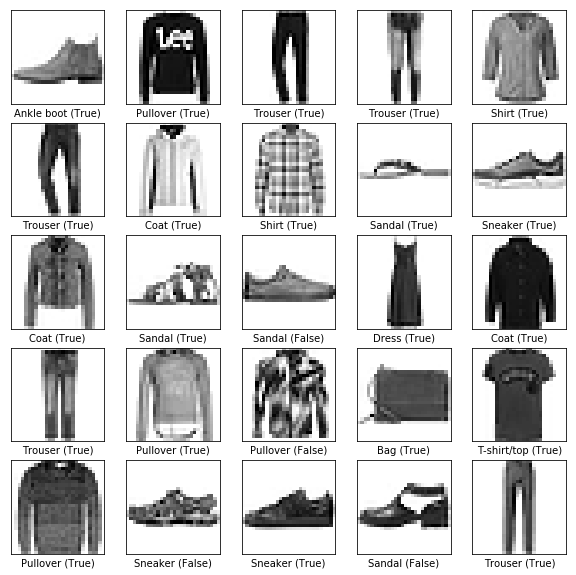

In [70]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i] == predicted_label
    plt.xlabel("{} ({})".format(class_names[predicted_label],true_label)) 

In [72]:
img = test_images[1000]

img = img.reshape(1,28,28)

In [73]:
predictions = model.predict(img)